# Object Detection Without Deep Learning 

in this notebook we demonstrated a way to do object detection with application on remote sensing without using Deep learning. In this example we used 
image processing technique with the openCV package on Python. We will use drone images or download HR Satellite data from google Earth Pro.  for simplication we will use Rice field in the north of Senegal. 
Author : Modou MBAYE
Email:  **mbaye@modou.dev**


In [29]:
import cv2
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt 


In [30]:
%whos
    

Variable      Type       Data/Info
----------------------------------
Path          type       <class 'pathlib.Path'>
area          float      1104.5
cnt           ndarray    182x1x2: 364 elems, type `int32`, 1456 bytes
contours      list       n=5054
cv2           module     <module 'cv2.cv2' from 'c<...>\cv2.cp38-win_amd64.pyd'>
h             int        59
high_blue     ndarray    3: 3 elems, type `int32`, 12 bytes
hsv_img       ndarray    512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
img           ndarray    512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
low_blue      ndarray    3: 3 elems, type `int32`, 12 bytes
mask          ndarray    512x512: 262144 elems, type `uint8`, 262144 bytes (256.0 kb)
np            module     <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
plt           module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
update_mask   ndarray    512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
w      

# read image dimensions for dimensions reduction
I usually  used to convert image to 512 by 512 


In [44]:
img=cv2.imread('CNRF/rosso2.jpg')

img=cv2.resize(img,(512,512))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)



w, h , _=img.shape
print("raw image width = ", w) 
print("raw image height = ", h)

img=cv2.resize(img,(512,512))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

print("resized image width --> ", w) 
print("resizzed  image height --> ", h)

raw image width =  512
raw image height =  512
resized image width -->  512
resizzed  image height -->  512


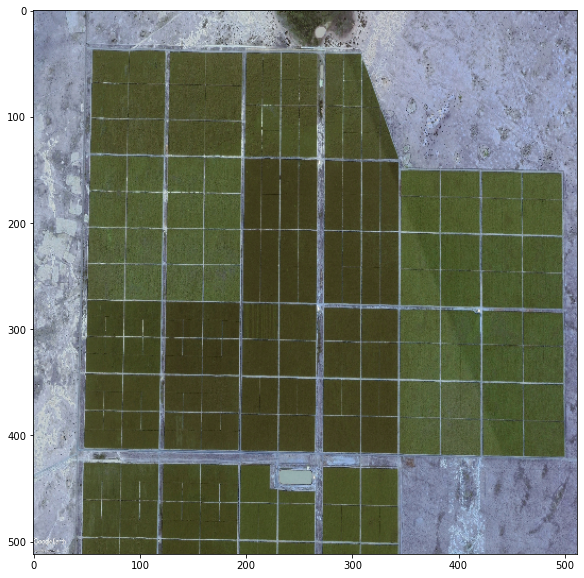

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show() 

# Change image from BGR to RGB and OR from  BGR TO

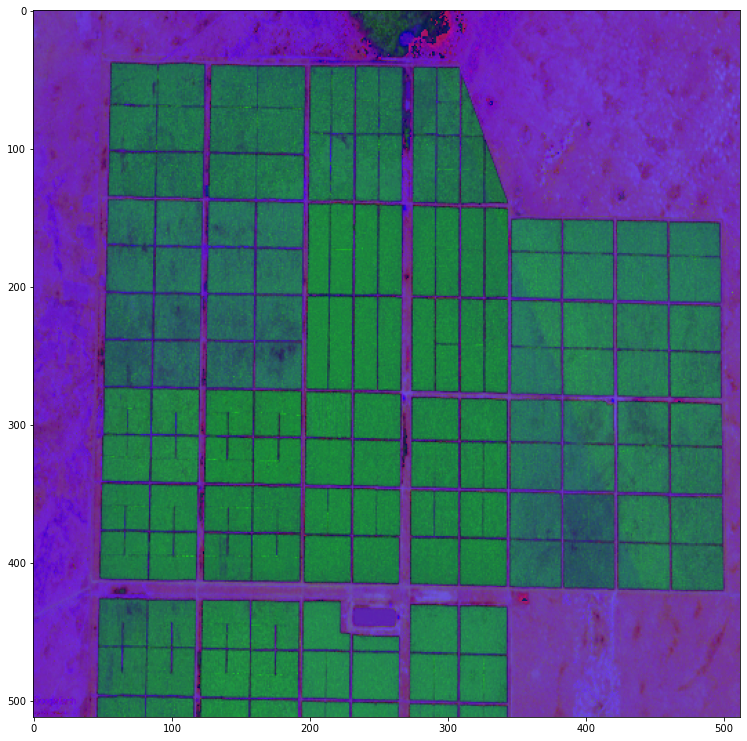

In [46]:
plt.figure(figsize=(13,13))
plt.imshow(hsv_img)
plt.show()

In [47]:
lower = np.array([0, 50,16])
higher = np.array([84, 255, 255])

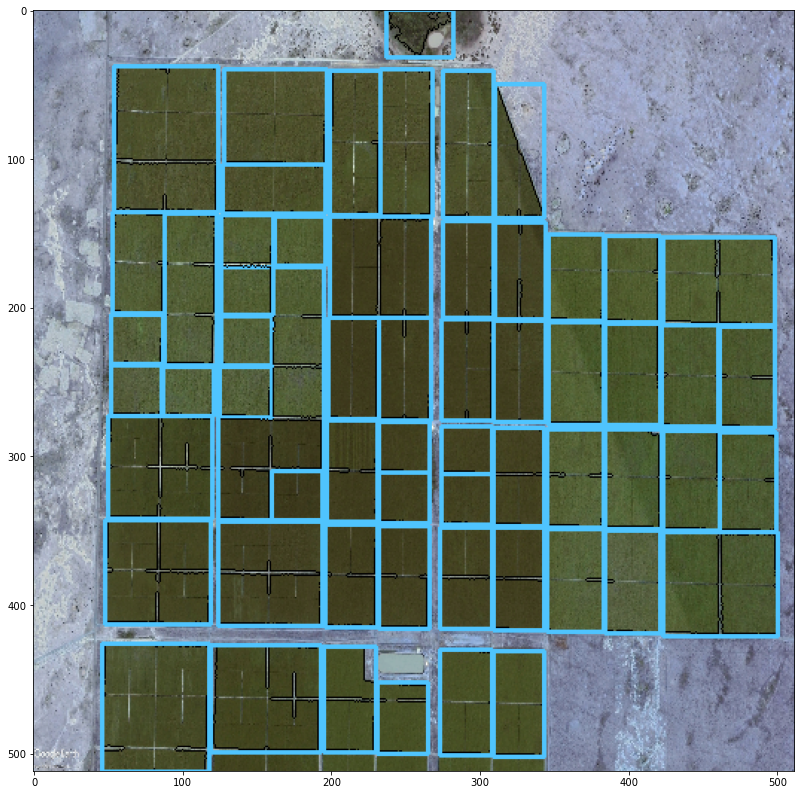

In [53]:
mask = cv2.inRange(hsv_img, lower, higher)
result=cv2.bitwise_and(img, img, mask=mask)
contours,_=cv2.findContours(mask, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area=cv2.contourArea(cnt)
    # print("area before filtering", area)
    if area >= 400:
        # print("area in px: ", area)
        
        cv2.drawContours(img,[cnt],-1,(0,0,0),1)
        (x,y,w,h)=cv2.boundingRect(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(79,196,254),2)

plt.figure(figsize=(14,14))
plt.imshow(img, cmap='gray')
plt.show()